In [1]:
import pandas as pd
import seaborn as sns
from dotenv import dotenv_values
from sklearn.model_selection import train_test_split

from config import get_connection
from data.db import execute_sql
from data.notifcation_preparation import prepare_dataset, flat_notifications_from_sql
from data.preprocessing import DataPreprocessor

In [2]:
conf = dotenv_values("../.env")
conn = get_connection(conf)
notifications = execute_sql(conn, "select * from notifications order by id")
raw_flat_data = prepare_dataset(flat_notifications_from_sql(notifications))
data_preprocessor = DataPreprocessor(raw_flat_data, True)
df = data_preprocessor.provide_ready_df()

['history_statsMap_-10_days_avg1HourVolume', 'history_statsMap_-12_hours_avg1HourVolume', 'history_statsMap_-14_days_avg1HourVolume', 'history_statsMap_-20_days_avg1HourVolume', 'history_statsMap_-24_hours_avg1HourVolume', 'history_statsMap_-28_days_avg1HourVolume', 'history_statsMap_-3_days_avg1HourVolume', 'history_statsMap_-5_days_avg1HourVolume', 'history_statsMap_-6_hours_avg1HourVolume', 'history_statsMap_-7_days_avg1HourVolume']


D:\Projects\trading-bot-ml\src\data\preprocessing.py:201: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_vol.drop(['label_up_return', 'label_down_return'], 1)


In [3]:
df

,_01_h_bars_vol_to_28d_avg_h_vol,_02_h_bars_vol_to_28d_avg_h_vol,_03_h_bars_vol_to_28d_avg_h_vol,btc_stats_statsMap_-10_days_avg1HourVolume,btc_stats_statsMap_-10_days_changeRate,btc_stats_statsMap_-10_days_close,btc_stats_statsMap_-10_days_high,btc_stats_statsMap_-10_days_low,btc_stats_statsMap_-10_days_open,btc_stats_statsMap_-12_hours_avg1HourVolume,...,history_statsMap_-6_hours_low,history_statsMap_-6_hours_open,history_statsMap_-7_days_avg1HourVolume,history_statsMap_-7_days_changeRate,history_statsMap_-7_days_high,history_statsMap_-7_days_low,history_statsMap_-7_days_open,label_down_return,label_up_return,price
0,5.192318,7.658774,0.980625,823.18,-10.0,42520.7,47600.1,42108.0,47299.7,135.07,...,0.361500,0.361900,79818.16,-33.0,0.585800,0.356200,0.553300,-17.584416,1.662338,0.385000
1,0.688743,0.150720,0.165391,823.18,-10.0,42520.7,47600.1,42108.0,47299.7,135.07,...,0.275900,0.280400,60903.32,-7.0,0.355800,0.252800,0.297400,-18.024862,1.312155,0.289600
4,2.150151,1.136304,1.130103,823.18,-10.0,42520.7,47600.1,42108.0,47299.7,135.07,...,0.050550,0.051460,284673.24,-22.0,0.068400,0.050030,0.065310,-14.995279,4.494806,0.052950
5,2.150151,1.136304,1.130103,823.18,-10.0,42520.7,47600.1,42108.0,47299.7,135.07,...,0.050550,0.051460,284673.24,-22.0,0.068400,0.050030,0.065310,-15.075472,4.396226,0.053000
6,0.805183,0.933732,0.815942,823.18,-10.0,42520.7,47600.1,42108.0,47299.7,135.07,...,0.000724,0.000750,5508550.15,-18.0,0.000976,0.000702,0.000891,-11.512718,2.141901,0.000747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83748,0.038778,0.097250,0.034751,536.85,7.0,20471.9,22500.0,18789.1,19192.2,374.14,...,0.573100,0.576900,2396.74,0.0,0.635000,0.552600,0.572000,-6.445047,0.067843,0.589600
83749,1.220498,1.024316,1.419165,536.85,7.0,20471.9,22500.0,18789.1,19192.2,374.14,...,0.028590,0.029240,135284.83,5.0,0.033900,0.027340,0.028160,-7.624633,9.612252,0.030690
83750,0.478357,0.000000,0.079935,536.85,7.0,20471.9,22500.0,18789.1,19192.2,374.14,...,0.008200,0.008564,80292.67,-6.0,0.009677,0.008182,0.008790,-9.605822,0.533657,0.008245
83751,10.469426,9.920887,1.619170,536.85,7.0,20471.9,22500.0,18789.1,19192.2,374.14,...,0.067830,0.069120,850806.70,49.0,0.132970,0.049330,0.050230,-11.990729,5.330568,0.081980


In [4]:
# from data.scalers import min_max_scaler, standard_scaler
# df_norm = min_max_scaler(df)
# df_std= standard_scaler(df)


In [5]:
label_cols = ['label_up_return', 'label_down_return']
x = df.drop(label_cols, axis=1)
y_up = df['label_up_return']
y_down = df['label_down_return']

In [6]:
x.shape

(49534, 673)

In [7]:
from model_factory import ModelFactory
_, y_up_class = ModelFactory.prepare_classification_label(df, 20)
y_up_class.value_counts()


label_20_up
0              41566
1               7968
dtype: int64

In [8]:
y_up_class.shape


(49534, 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y_up_class, test_size=0.1)


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [11]:
# names = ["Nearest_Neighbors", 
#          #"Linear_SVM", 
#          #"Polynomial_SVM", 
#          #"RBF_SVM", 
#          #"Gaussian_Process",
#          "Gradient_Boosting", 
#          "Decision_Tree", 
#          "Extra_Trees", 
#          "Random_Forest", 
#          "Neural_Net", 
#          "AdaBoost",
#          "Naive_Bayes",
#          "QDA",
#          "SGD"]
algos = {
    "Nearest_Neighbors": KNeighborsClassifier(3),
     #"Linear_SVM", 
     #"Polynomial_SVM", 
     #"RBF_SVM", 
     #"Gaussian_Process",
     "Gradient_Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
     "Decision_Tree": DecisionTreeClassifier(max_depth=5),
     "Extra_Trees": ExtraTreesClassifier(n_estimators=10, min_samples_split=2), 
     "Random_Forest": RandomForestClassifier(max_depth=5, n_estimators=100), 
     "Neural_Net": MLPClassifier(alpha=1, max_iter=1000), 
     "AdaBoost": AdaBoostClassifier(n_estimators=100),
     "Naive_Bayes": GaussianNB(),
     "QDA": QuadraticDiscriminantAnalysis(),
     "SGD": SGDClassifier(loss="hinge", penalty="l2")
}
# classifiers = [
#     KNeighborsClassifier(3),
#     #SVC(kernel="linear", C=0.025),
#     #SVC(kernel="poly", degree=3, C=0.025),
#     #SVC(kernel="rbf", C=1, gamma=2),
#     #GaussianProcessClassifier(1.0 * RBF(1.0)),
#     GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
#     DecisionTreeClassifier(max_depth=5),
#     ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
#     RandomForestClassifier(max_depth=5, n_estimators=100),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(n_estimators=100),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     SGDClassifier(loss="hinge", penalty="l2")]


In [12]:
scores = []
models = []
result = {}

In [13]:
def train(clf):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    return score
def train_gen(algos_dict):
    for name, clf in algos_dict.items():
        print(f"Training {name} model")
        score = train(clf)
        yield score, clf
check_list = ["Nearest_Neighbors", 
              "Gradient_Boosting", 
              "Extra_Trees",
              "Random_Forest",
              "Neural_Net",
              "AdaBoost",
              "Naive_Bayes"
              ]
for k, v in train_gen({k: v for k, v in algos.items() if k in check_list}):
    result[k] = v
    scores.append(k)
    models.append(v)

Training Nearest_Neighbors model
Training Gradient_Boosting model
Training Extra_Trees model
Training Random_Forest model
Training Neural_Net model
Training AdaBoost model
Training Naive_Bayes model


C:\Users\hustlestar\Anaconda3\envs\x-dev\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hustlestar\Anaconda3\envs\x-dev\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hustlestar\AppData\Local\Temp\ipykernel_1852\1782329729.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
C:\Users\hustlestar\AppData\Local\Temp\ipykernel_1852\1782329729.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [14]:
df = pd.DataFrame()
df['name'] = check_list
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.876262
1,Gradient_Boosting,0.886354
2,Extra_Trees,0.933387
3,Random_Forest,0.844368
4,Neural_Net,0.631005
5,AdaBoost,0.843763
6,Naive_Bayes,0.159063


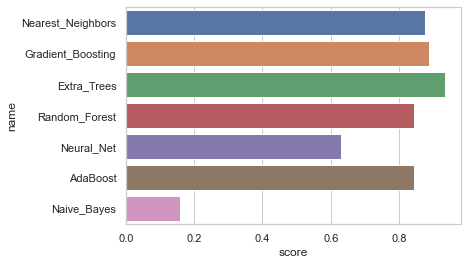

In [15]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)